In [3]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
from tensorflow import keras
import matplotlib
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential, Model 
from keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D
from keras import backend as k 
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping
import cv2
import skimage
tf.__version__

'1.13.1'

# Load Greek Characters Dataset and Labels (Any combination of greek letters)

In [4]:
greek_data_path = r"/Users/AdamHarris/Desktop/GreekCardinalityProximityInvariance/Images"
greek_list = os.listdir(greek_data_path) 
num_greek_samples = np.size(greek_list)
print(num_greek_samples)
greek_list.sort()
greek_labels = np.loadtxt('/Users/AdamHarris/Desktop/GreekCardinalityProximityInvariance/labels.csv', delimiter=',', skiprows=0)
greek_labels = greek_labels.astype(np.uint8)
greek_labels = greek_labels[:,4]
print(len(greek_labels))

10000
10000


In [5]:
im = Image.open(greek_data_path + '/' + greek_list[0])
np_im = np.array(im)
m, n = np_im.shape[0:2] # get the size of the images
num_images = len(greek_list)
print(m, n, num_images)
greek_images = np.array([np.array(Image.open(greek_data_path + '/' + fname)) for fname in greek_list])

100 100 10000


#  Load Angelic Dataset (Test set for Greek Characters Network)

In [6]:
angelic_data_path = r"/Users/AdamHarris/Desktop/AngelicCardinalityProximityInvariance/Images"
angelic_list = os.listdir(angelic_data_path) 
num_angelic_samples = np.size(angelic_list)
print(num_angelic_samples)
angelic_list.sort()
angelic_labels = np.loadtxt('/Users/AdamHarris/Desktop/AngelicCardinalityProximityInvariance/labels.csv', delimiter=',', skiprows=0)
angelic_labels = angelic_labels.astype(np.uint8)
angelic_labels = angelic_labels[:,4]
print(len(angelic_labels))

2000
2000


In [7]:
im = Image.open(angelic_data_path + '/' + angelic_list[0])
np_im = np.array(im)
m, n = np_im.shape[0:2] # get the size of the images
num_images = len(angelic_list)
print(m, n, num_images)
angelic_images = np.array([np.array(Image.open(angelic_data_path + '/' + fname)) for fname in angelic_list])

100 100 2000


# Import Omniglot Dataset Halves

In [8]:
omniglot_background_data_path = r"/Users/AdamHarris/Desktop/FullOmniglotTrain/Images"
omniglot_background_list = os.listdir(omniglot_background_data_path) 
num_omniglot_train_samples = np.size(omniglot_background_list)
print(num_omniglot_train_samples)
omniglot_background_list.sort()
omniglot_background_labels = np.loadtxt('/Users/AdamHarris/Desktop/FullOmniglotTrain/labels.csv', delimiter=',', skiprows=0)
omniglot_background_labels = omniglot_background_labels.astype(np.uint8)
omniglot_background_labels = omniglot_background_labels[:,4]
print(len(omniglot_background_labels))

10000
10000


In [9]:
im = Image.open(omniglot_background_data_path + '/' + omniglot_background_list[0])
np_im = np.array(im)
m, n = np_im.shape[0:2] # get the size of the images
num_images = len(omniglot_background_list)
print(m, n, num_images)
omniglot_background_images = np.array([np.array(Image.open(omniglot_background_data_path + '/' + fname)) for fname in omniglot_background_list])

100 100 10000


In [10]:
omniglot_eval_data_path = r"/Users/AdamHarris/Desktop/FullOmniglotTest/Images"
omniglot_eval_list = os.listdir(omniglot_eval_data_path) 
num_omniglot_eval_samples = np.size(omniglot_eval_list)
print(num_omniglot_eval_samples)
omniglot_eval_list.sort()
omniglot_eval_labels = np.loadtxt('/Users/AdamHarris/Desktop/FullOmniglotTest/labels.csv', delimiter=',', skiprows=0)
omniglot_eval_labels = omniglot_eval_labels.astype(np.uint8)
omniglot_eval_labels = omniglot_eval_labels[:,4]

2000


In [11]:
im = Image.open(omniglot_eval_data_path + '/' + omniglot_eval_list[0])
np_im = np.array(im)
m, n = np_im.shape[0:2] # get the size of the images
num_images = len(omniglot_eval_list)
print(m, n, num_images)
omniglot_eval_images = np.array([np.array(Image.open(omniglot_eval_data_path + '/' + fname)) for fname in omniglot_eval_list])

100 100 2000


# Visualise datasets

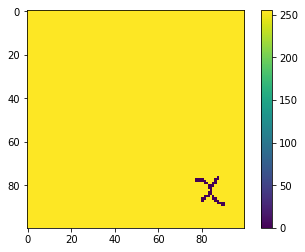

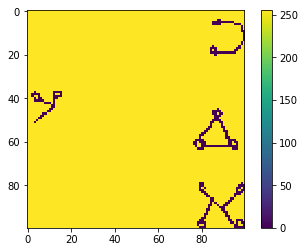

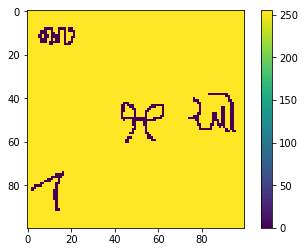

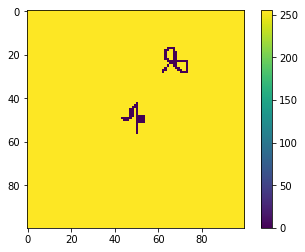

In [12]:
plt.figure()
plt.imshow(greek_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

plt.figure()
plt.imshow(angelic_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

plt.figure()
plt.imshow(omniglot_background_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

plt.figure()
plt.imshow(omniglot_eval_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

# Split Greek and Omniglot_background into train/test for models 1 + 3

In [13]:
greek_train, greek_test, greek_train_labels, greek_test_labels = train_test_split(greek_images, 
                                                                                  greek_labels, 
                                                                                  test_size=0.2)
[omniglot_background_train, 
 omniglot_background_test, 
 omniglot_background_train_labels, 
 omniglot_background_test_labels] = train_test_split(omniglot_background_images, 
                                                     omniglot_background_labels, 
                                                     test_size=0.2)

# Normalise and make RGB for Reset

In [14]:
greek_train = skimage.color.grey2rgb(greek_train / 255.0)
greek_test = skimage.color.grey2rgb(greek_test / 255.0)
angelic_images = skimage.color.grey2rgb(angelic_images / 255.0)
omniglot_background_train = skimage.color.grey2rgb(omniglot_background_train / 255.0)
omniglot_background_test = skimage.color.grey2rgb(omniglot_background_test / 255.0)
omniglot_eval_images = skimage.color.grey2rgb(omniglot_eval_images / 255.0)

In [1]:
greek_test_transfer = greek_test

NameError: name 'greek_test' is not defined

# RESNET
## Import resnet 50 with imagenet weights, chop off the head, add dense output layer 

### Models to train / test:

Train on Greek, Test on Greek

Train on Greek, Test on Angelic 

Train on Half of Omniglot, Test same half

Train on half omniglot: test on other half of omniglot

In [15]:
resnet = applications.ResNet50(include_top=False, weights='imagenet', input_shape=(m, n, 3))
for layer in resnet.layers[:]:
    layer.trainable = True
out = resnet.output
out = Flatten()(out)
cardinality_output = Dense(10, activation="softmax")(out)

Instructions for updating:
Colocations handled automatically by placer.


/Users/AdamHarris/miniconda3/lib/python3.7/site-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


In [16]:
greek_letter_counter = Model(input = resnet.input, output = (cardinality_output))

/Users/AdamHarris/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  """Entry point for launching an IPython kernel.


In [36]:
resnet2 = applications.ResNet50(include_top=False, weights='imagenet', input_shape=(m, n, 3))
for layer in resnet2.layers[:]:
    layer.trainable = True
out2 = resnet2.output
out2 = Flatten()(out2)
cardinality_output2 = Dense(10, activation="softmax")(out2)
greek_counter_angelic_test = Model(input = resnet2.input, output = (cardinality_output2))

/Users/AdamHarris/miniconda3/lib/python3.7/site-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '
/Users/AdamHarris/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  import sys


In [18]:
resnet3 = applications.ResNet50(include_top=False, weights='imagenet', input_shape=(m, n, 3))
for layer in resnet3.layers[:]:
    layer.trainable = True
out3 = resnet3.output
out3 = Flatten()(out3)
cardinality_output3 = Dense(10, activation="softmax")(out3)
omniglot_counter = Model(input = resnet3.input, output = (cardinality_output3))

/Users/AdamHarris/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  import sys


In [19]:
resnet4 = applications.ResNet50(include_top=False, weights='imagenet', input_shape=(m, n, 3))
for layer in resnet4.layers[:]:
    layer.trainable = True
out4 = resnet4.output
out4 = Flatten()(out4)
cardinality_output4 = Dense(10, activation="softmax")(out4)
omniglot_counter_different_test = Model(input = resnet4.input, output = (cardinality_output4))

/Users/AdamHarris/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  import sys


In [37]:
# greek_letter_counter.compile(loss = "sparse_categorical_crossentropy",
#                              optimizer = optimizers.SGD(lr=0.0001, momentum=0.9), 
#                              metrics=["accuracy"])
greek_counter_angelic_test.compile(loss = "sparse_categorical_crossentropy",
                                   optimizer = optimizers.SGD(lr=0.0001, momentum=0.9), 
                                   metrics=["accuracy"])
# omniglot_counter.compile(loss = "sparse_categorical_crossentropy",
#                          optimizer = optimizers.SGD(lr=0.0001, momentum=0.9), 
#                          metrics=["accuracy"])
# omniglot_counter_different_test.compile(loss = "sparse_categorical_crossentropy",
#                                         optimizer = optimizers.SGD(lr=0.0001, momentum=0.9), 
#                                         metrics=["accuracy"])

In [22]:
history_greek = greek_letter_counter.fit(greek_train, greek_train_labels,
                                         epochs = 10, 
                                         validation_data = (greek_test, greek_test_labels),
                                         batch_size=32)

Train on 8000 samples, validate on 2000 samples
Epoch 1/10
8000/8000 [==============================] - 1880s 235ms/step - loss: 1.4254 - acc: 0.4805 - val_loss: 2.2592 - val_acc: 0.3570
Epoch 2/10
8000/8000 [==============================] - 1847s 231ms/step - loss: 0.6626 - acc: 0.7356 - val_loss: 0.7977 - val_acc: 0.6585
Epoch 3/10
8000/8000 [==============================] - 1867s 233ms/step - loss: 0.3032 - acc: 0.8969 - val_loss: 0.6598 - val_acc: 0.7215
Epoch 4/10
8000/8000 [==============================] - 1844s 230ms/step - loss: 0.1456 - acc: 0.9666 - val_loss: 0.7260 - val_acc: 0.7165
Epoch 5/10
8000/8000 [==============================] - 1860s 232ms/step - loss: 0.0951 - acc: 0.9800 - val_loss: 0.6189 - val_acc: 0.7495
Epoch 6/10
8000/8000 [==============================] - 1853s 232ms/step - loss: 0.0660 - acc: 0.9885 - val_loss: 0.6182 - val_acc: 0.7535
Epoch 7/10
8000/8000 [==============================] - 1859s 232ms/step - loss: 0.0567 - acc: 0.9906 - val_loss: 0.58

In [38]:
history_greek_with_angelic_test = greek_counter_angelic_test.fit(greek_train, greek_train_labels,
                                                                 epochs = 10, 
                                                                 validation_data = (angelic_images, angelic_labels),
                                                                 batch_size=32)

Train on 8000 samples, validate on 2000 samples
Epoch 1/10
8000/8000 [==============================] - 2038s 255ms/step - loss: 1.4343 - acc: 0.4766 - val_loss: 6.8391 - val_acc: 0.0985
Epoch 2/10
8000/8000 [==============================] - 1907s 238ms/step - loss: 0.5993 - acc: 0.7534 - val_loss: 1.7102 - val_acc: 0.3640
Epoch 3/10
8000/8000 [==============================] - 1978s 247ms/step - loss: 0.2959 - acc: 0.8965 - val_loss: 2.5207 - val_acc: 0.3165
Epoch 4/10
8000/8000 [==============================] - 1911s 239ms/step - loss: 0.1564 - acc: 0.9592 - val_loss: 1.9130 - val_acc: 0.4655
Epoch 5/10
8000/8000 [==============================] - 1940s 242ms/step - loss: 0.0886 - acc: 0.9845 - val_loss: 1.4676 - val_acc: 0.5640
Epoch 6/10
8000/8000 [==============================] - 1938s 242ms/step - loss: 0.0598 - acc: 0.9910 - val_loss: 2.6625 - val_acc: 0.2845
Epoch 7/10
8000/8000 [==============================] - 1934s 242ms/step - loss: 0.0468 - acc: 0.9931 - val_loss: 1.56

In [21]:
history_omnniglot_background_counter = omniglot_counter.fit(omniglot_background_train, omniglot_background_train_labels,
                                       epochs = 10, 
                                       validation_data = (omniglot_background_test, 
                                                          omniglot_background_test_labels),
                                       batch_size=32)

Instructions for updating:
Use tf.cast instead.
Train on 8000 samples, validate on 2000 samples
Epoch 1/10
8000/8000 [==============================] - 1975s 247ms/step - loss: 1.4409 - acc: 0.4764 - val_loss: 3.2897 - val_acc: 0.2620
Epoch 2/10
8000/8000 [==============================] - 1864s 233ms/step - loss: 0.6651 - acc: 0.7335 - val_loss: 1.4744 - val_acc: 0.4255
Epoch 3/10
8000/8000 [==============================] - 1969s 246ms/step - loss: 0.3214 - acc: 0.8879 - val_loss: 1.9094 - val_acc: 0.5040
Epoch 4/10
8000/8000 [==============================] - 1889s 236ms/step - loss: 0.1842 - acc: 0.9519 - val_loss: 2.4430 - val_acc: 0.4290
Epoch 5/10
8000/8000 [==============================] - 1887s 236ms/step - loss: 0.0973 - acc: 0.9821 - val_loss: 2.3830 - val_acc: 0.3750
Epoch 6/10
8000/8000 [==============================] - 1815s 227ms/step - loss: 0.0650 - acc: 0.9909 - val_loss: 0.7149 - val_acc: 0.7115
Epoch 7/10
8000/8000 [==============================] - 1828s 228ms/st

In [39]:
history_omniglot_counter_eval_test = omniglot_counter_different_test.fit(omniglot_background_train, 
                                                                         omniglot_background_train_labels,
                                                                         epochs = 10, 
                                                                         validation_data = (omniglot_eval_images,
                                                                                            omniglot_eval_labels),
                                                                         batch_size=32)

Train on 8000 samples, validate on 2000 samples
Epoch 1/10
8000/8000 [==============================] - 2001s 250ms/step - loss: 1.4774 - acc: 0.4838 - val_loss: 1.6140 - val_acc: 0.3125
Epoch 2/10
8000/8000 [==============================] - 1937s 242ms/step - loss: 0.6450 - acc: 0.7384 - val_loss: 1.5902 - val_acc: 0.4520
Epoch 3/10
8000/8000 [==============================] - 1910s 239ms/step - loss: 0.2961 - acc: 0.9045 - val_loss: 1.0686 - val_acc: 0.5635
Epoch 4/10
8000/8000 [==============================] - 1921s 240ms/step - loss: 0.1493 - acc: 0.9642 - val_loss: 0.8829 - val_acc: 0.6440
Epoch 5/10
8000/8000 [==============================] - 1955s 244ms/step - loss: 0.0845 - acc: 0.9855 - val_loss: 0.7684 - val_acc: 0.6890
Epoch 6/10
8000/8000 [==============================] - 1935s 242ms/step - loss: 0.0595 - acc: 0.9921 - val_loss: 0.7478 - val_acc: 0.7000
Epoch 7/10
8000/8000 [==============================] - 1945s 243ms/step - loss: 0.0467 - acc: 0.9941 - val_loss: 0.76

In [40]:
greek_letter_counter.save('/Users/AdamHarris/Desktop/CardinalityProximityControl2/greek_letter_counter2.hdf5')
greek_counter_angelic_test.save('/Users/AdamHarris/Desktop/CardinalityProximityControl2/greek_letter_counter_angelic_test2.hdf5')
omniglot_counter.save('/Users/AdamHarris/Desktop/CardinalityProximityControl2/omniglot_counter2.hdf5')
omniglot_counter_different_test.save('/Users/AdamHarris/Desktop/CardinalityProximityControl2/omniglot_counter_different_test2.hdf5')

In [41]:
import pandas as pd
savefolder = r'/Users/AdamHarris/Desktop/CardinalityProximityControl2/'

df_greek = pd.DataFrame(history_greek.history)
df_greek.to_csv(savefolder + 'history_greek2.csv')

df_greek_with_angelic_test = pd.DataFrame(history_greek_with_angelic_test.history)
df_greek_with_angelic_test.to_csv(savefolder + 'history_greek_with_angelic_test2.csv')

df_omnniglot_background_counter = pd.DataFrame(history_omnniglot_background_counter.history)
df_omnniglot_background_counter.to_csv(savefolder + 'history_omnniglot_background_counter2.csv')

df_omniglot_counter_eval_test = pd.DataFrame(history_omniglot_counter_eval_test.history)
df_omniglot_counter_eval_test.to_csv(savefolder + 'history_omniglot_counter_eval_test2.csv')

                
#,index=False, header=False)

# PLOTS

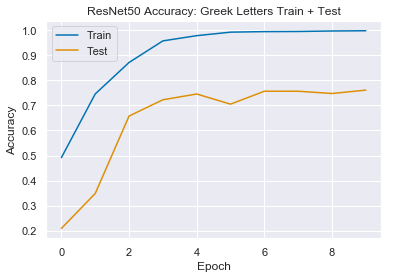

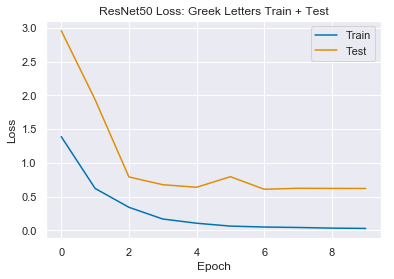

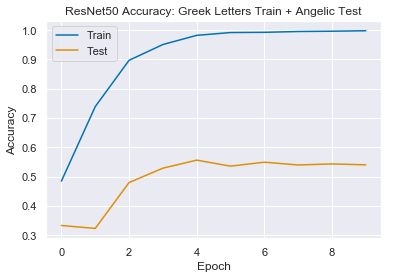

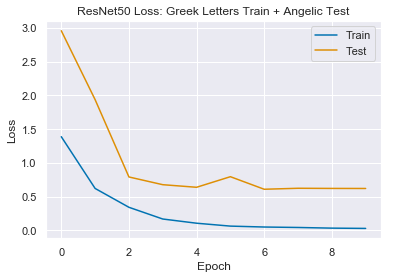

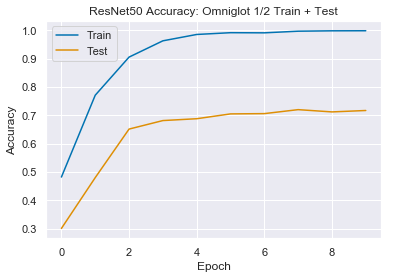

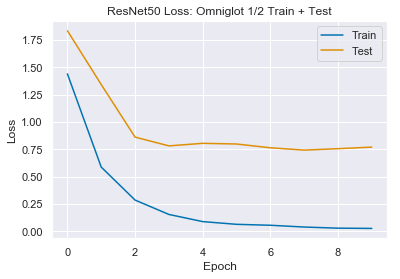

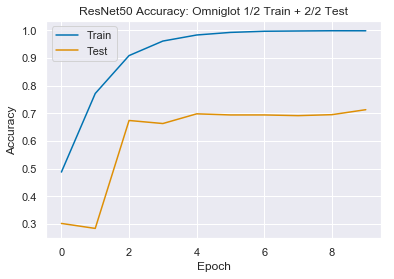

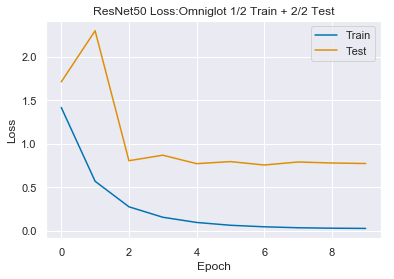

In [145]:
import seaborn as sns
sns.set(palette="colorblind")#(style = "grey", palette="colorblind")

# Plot training & validation accuracy values   https://keras.io/visualization/
plt.plot(history_greek.history['acc'])
plt.plot(history_greek.history['val_acc'])
plt.title('ResNet50 Accuracy: Greek Letters Train + Test')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history_greek.history['loss'])
plt.plot(history_greek.history['val_loss'])
plt.title('ResNet50 Loss: Greek Letters Train + Test')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()



plt.plot(history_greek_with_angelic_test.history['acc'])
plt.plot(history_greek_with_angelic_test.history['val_acc'])
plt.title('ResNet50 Accuracy: Greek Letters Train + Angelic Test')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history_greek_with_angelic_test.history['loss'])
plt.plot(history_greek_with_angelic_test.history['val_loss'])
plt.title('ResNet50 Loss: Greek Letters Train + Angelic Test')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()




plt.plot(history_omnniglot_background_counter.history['acc'])
plt.plot(history_omnniglot_background_counter.history['val_acc'])
plt.title('ResNet50 Accuracy: Omniglot 1/2 Train + Test')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history_omnniglot_background_counter.history['loss'])
plt.plot(history_omnniglot_background_counter.history['val_loss'])
plt.title('ResNet50 Loss: Omniglot 1/2 Train + Test')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()



plt.plot(history_omniglot_counter_eval_test.history['acc'])
plt.plot(history_omniglot_counter_eval_test.history['val_acc'])
plt.title('ResNet50 Accuracy: Omniglot 1/2 Train + 2/2 Test')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history_omniglot_counter_eval_test.history['loss'])
plt.plot(history_omniglot_counter_eval_test.history['val_loss'])
plt.title('ResNet50 Loss:Omniglot 1/2 Train + 2/2 Test')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

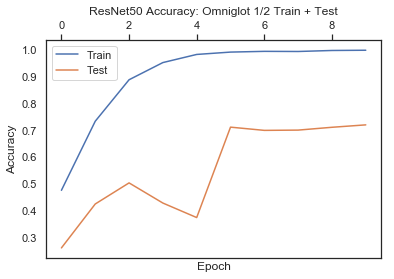

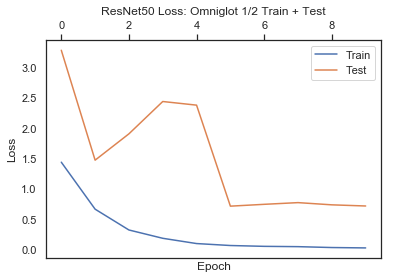

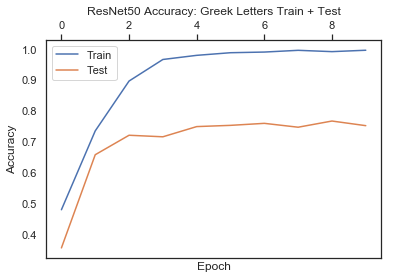

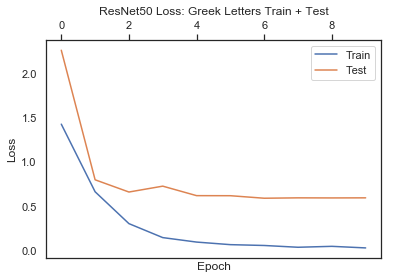

In [34]:
plt.plot(history_omnniglot_background_counter.history['acc'])
plt.plot(history_omnniglot_background_counter.history['val_acc'])
plt.title('ResNet50 Accuracy: Omniglot 1/2 Train + Test')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history_omnniglot_background_counter.history['loss'])
plt.plot(history_omnniglot_background_counter.history['val_loss'])
plt.title('ResNet50 Loss: Omniglot 1/2 Train + Test')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()


# Plot training & validation accuracy values   https://keras.io/visualization/
plt.plot(history_greek.history['acc'])
plt.plot(history_greek.history['val_acc'])
plt.title('ResNet50 Accuracy: Greek Letters Train + Test')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history_greek.history['loss'])
plt.plot(history_greek.history['val_loss'])
plt.title('ResNet50 Loss: Greek Letters Train + Test')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

# Feature Visualisation?

In [42]:
greek_counter_angelic_predictions = greek_letter_counter.predict(angelic_images)

In [43]:
print(greek_counter_angelic_predictions)
np.shape(greek_counter_angelic_predictions)

[[9.08995712e-10 2.97903444e-08 1.24311146e-05 ... 2.30859662e-03
  9.59440658e-05 2.88395455e-07]
 [9.77406957e-12 3.19337859e-14 1.68864261e-12 ... 9.82554495e-01
  1.35385385e-02 2.82248075e-04]
 [2.42123297e-05 1.50465574e-02 7.81181216e-01 ... 1.67746748e-06
  1.17604984e-07 1.84545090e-09]
 ...
 [1.40433144e-07 9.98233080e-01 1.74897618e-03 ... 1.18468424e-09
  6.93798907e-10 1.88723447e-11]
 [1.03624596e-12 6.27307383e-14 2.55607693e-14 ... 3.39232465e-05
  1.56323382e-04 9.99809682e-01]
 [2.74235864e-12 1.20190370e-13 6.57745668e-13 ... 4.03263010e-02
  9.59531486e-01 1.16145766e-05]]


(2000, 10)

In [44]:
greek_angelic_predicted_labels = greek_counter_angelic_predictions.argmax(axis=-1)

<function matplotlib.pyplot.show(*args, **kw)>

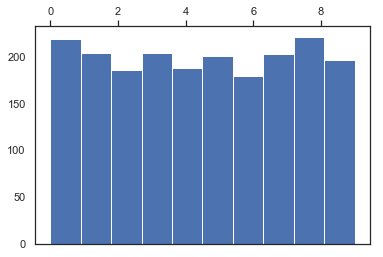

In [45]:
plt.hist(angelic_labels)
plt.show

In [46]:
greek_angelic_matrix = np.zeros((10, 10), dtype = np.float64)

In [47]:
for c in range(10):
    for i in range(10):
        count = 0
        for d in range(2000):
            count = count + np.sum(greek_angelic_predicted_labels[d] == i and angelic_labels[d] == c)
        greek_angelic_matrix[c, i] = count

In [48]:
greek_angelic_matrix = np.transpose(greek_angelic_matrix)
print(greek_angelic_matrix)

[[219.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0. 181.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.  23. 108.   6.   0.   0.   0.   0.   0.   0.]
 [  0.   0.  77.  96.  14.   0.   0.   0.   0.   0.]
 [  0.   0.   1.  94. 101.  25.   0.   0.   0.   0.]
 [  0.   0.   0.   4.  42.  29.   3.   0.   0.   0.]
 [  0.   0.   0.   4.  28.  98.  57.  10.   0.   0.]
 [  0.   0.   0.   0.   3.  37.  78.  62.  15.   0.]
 [  0.   0.   0.   0.   0.  11.  40. 114. 112.  25.]
 [  0.   0.   0.   0.   0.   0.   1.  17.  94. 171.]]


In [49]:
normalised_greek_angelic_matrix = np.zeros((10, 10), dtype = np.float64)
for c in range(10):
    for i in range(10):
       normalised_greek_angelic_matrix[c, i] = greek_angelic_matrix[c, i] / np.sum(greek_angelic_matrix[:, i])
print(normalised_greek_angelic_matrix)
df_normalised_greek_angelic_matrix = pd.DataFrame(normalised_greek_angelic_matrix)
df_normalised_greek_angelic_matrix.to_csv(savefolder + 'greek_with_angelic_test_Predictions_2.csv')

[[1.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.8872549  0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.1127451  0.58064516 0.02941176 0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.41397849 0.47058824 0.07446809 0.
  0.         0.         0.         0.        ]
 [0.         0.         0.00537634 0.46078431 0.53723404 0.125
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.01960784 0.22340426 0.145
  0.01675978 0.         0.         0.        ]
 [0.         0.         0.         0.01960784 0.14893617 0.49
  0.31843575 0.04926108 0.         0.        ]
 [0.         0.         0.         0.         0.01595745 0.185
  0.43575419 0.30541872 0.0678733  0.        ]
 [0.         0.         0.         0.         0.         0.055
  0.22346369 0.56157635 0.50678733 0.12755102]
 [0.         0.        

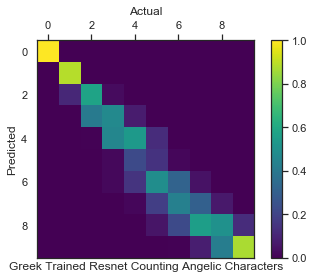

In [50]:
sns.set(style='white')
plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = False
plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = True
plt.imshow(normalised_greek_angelic_matrix, cmap = 'viridis')
plt.colorbar()
plt.title('Actual')
plt.ylabel('Predicted')
plt.xlabel('Greek Trained Resnet Counting Angelic Characters')
plt.show()

In [51]:
omniglot_counter_omniglot2_predictions = omniglot_counter.predict(omniglot_eval_images)

omniglot_other_half_predicted_labels = omniglot_counter_omniglot2_predictions.argmax(axis=-1)

In [52]:
omniglot_vs_omniglot2_matrix = np.zeros((10, 10), dtype = np.float64)
for c in range(10):
    for i in range(10):
        count = 0
        for d in range(2000):
            count = count + np.sum(omniglot_other_half_predicted_labels[d] == i and omniglot_eval_labels[d] == c)
        omniglot_vs_omniglot2_matrix[c, i] = count
omniglot_vs_omniglot2_matrix = np.transpose(omniglot_vs_omniglot2_matrix)
print(omniglot_vs_omniglot2_matrix)

[[202.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0. 215.   3.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0. 171.  13.   1.   0.   0.   0.   0.   0.]
 [  0.   0.  19. 133.  22.   1.   0.   0.   0.   0.]
 [  0.   0.   0.  28. 132.  65.   7.   0.   0.   0.]
 [  0.   0.   0.   0.  27. 103.  54.   2.   0.   0.]
 [  0.   0.   0.   0.   0.  37.  94.  49.   5.   0.]
 [  0.   0.   0.   0.   0.   1.  42.  99.  35.   2.]
 [  0.   0.   0.   0.   0.   0.   4.  60. 120.  59.]
 [  0.   0.   0.   0.   0.   0.   0.   0.  24. 171.]]


In [53]:
normalised_omniglot_vs_omniglot2_matrix = np.zeros((10, 10), dtype = np.float64)
for c in range(10):
    for i in range(10):
       normalised_omniglot_vs_omniglot2_matrix[c, i] = omniglot_vs_omniglot2_matrix[c, i] / np.sum(omniglot_vs_omniglot2_matrix[:, i])
print(normalised_omniglot_vs_omniglot2_matrix)
df_normalised_omniglot_vs_omniglot2_matrix = pd.DataFrame(normalised_omniglot_vs_omniglot2_matrix)
df_normalised_omniglot_vs_omniglot2_matrix.to_csv(savefolder + 'gnormalised_omniglot_vs_omniglot2_matrix_Predictions2.csv')

[[1.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         1.         0.01554404 0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.88601036 0.07471264 0.00549451 0.
  0.         0.         0.         0.        ]
 [0.         0.         0.0984456  0.76436782 0.12087912 0.00483092
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.16091954 0.72527473 0.31400966
  0.03482587 0.         0.         0.        ]
 [0.         0.         0.         0.         0.14835165 0.49758454
  0.26865672 0.00952381 0.         0.        ]
 [0.         0.         0.         0.         0.         0.17874396
  0.46766169 0.23333333 0.02717391 0.        ]
 [0.         0.         0.         0.         0.         0.00483092
  0.20895522 0.47142857 0.19021739 0.00862069]
 [0.         0.         0.         0.         0.         0.
  0.0199005  0.28571429 0.65217391 0.2543103

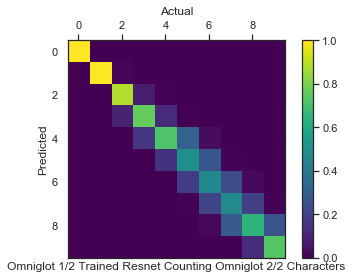

In [54]:
sns.set(style='white')
plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = False
plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = True
plt.imshow(normalised_omniglot_vs_omniglot2_matrix, cmap = 'viridis')
plt.colorbar()
plt.title('Actual')
plt.ylabel('Predicted')
plt.xlabel('Omniglot 1/2 Trained Resnet Counting Omniglot 2/2 Characters')
plt.show()

In [55]:
greek_counter_greek_predictions = greek_letter_counter.predict(greek_test)

In [56]:
greek_predicted_labels = greek_counter_greek_predictions.argmax(axis=-1)
greek_prediction_matrix = np.zeros((10, 10), dtype = np.float64)
for c in range(10):
    for i in range(10):
        count = 0
        for d in range(2000):
            count = count + np.sum(greek_predicted_labels[d] == i and greek_test_labels[d] == c)
        greek_prediction_matrix[c, i] = count
greek_prediction_matrix = np.transpose(greek_prediction_matrix)
print(greek_prediction_matrix)

[[232.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0. 208.  13.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   1. 169.  15.   0.   0.   0.   0.   0.   0.]
 [  0.   0.  19. 142.  27.   0.   0.   0.   0.   0.]
 [  0.   0.   0.  26. 106.  35.   6.   0.   0.   0.]
 [  0.   0.   0.   0.  40.  91.  24.   2.   0.   0.]
 [  0.   0.   0.   0.   4.  55. 113.  39.   0.   0.]
 [  0.   0.   0.   0.   0.   6.  28.  99.  25.   0.]
 [  0.   0.   0.   0.   0.   0.  10.  50. 150.  24.]
 [  0.   0.   0.   0.   0.   0.   0.   1.  45. 195.]]


In [57]:
count = 0
for i in range(2000):
 count = count + np.sum(greek_predicted_labels[i] == 0 and greek_test_labels[i] == 0)
print(count)

232


In [58]:
normalised_greek_prediction_matrix = np.zeros((10, 10), dtype = np.float64)
for c in range(10):
    for i in range(10):
       normalised_greek_prediction_matrix[c, i] = greek_prediction_matrix[c, i] / np.sum(greek_prediction_matrix[:, i])
print(normalised_greek_prediction_matrix)
df_normalised_greek_prediction_matrix = pd.DataFrame(normalised_greek_prediction_matrix)
df_normalised_greek_prediction_matrix.to_csv(savefolder + 'normalised_onormalised_greek_prediction_matrix.csv')

[[1.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.99521531 0.06467662 0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.00478469 0.84079602 0.08196721 0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.09452736 0.77595628 0.15254237 0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.1420765  0.59887006 0.18716578
  0.03314917 0.         0.         0.        ]
 [0.         0.         0.         0.         0.2259887  0.48663102
  0.13259669 0.0104712  0.         0.        ]
 [0.         0.         0.         0.         0.02259887 0.29411765
  0.62430939 0.20418848 0.         0.        ]
 [0.         0.         0.         0.         0.         0.03208556
  0.15469613 0.51832461 0.11363636 0.        ]
 [0.         0.         0.         0.         0.         0.
  0.05524862 0.2617801  0.68181818 0.10958904]
 [0. 

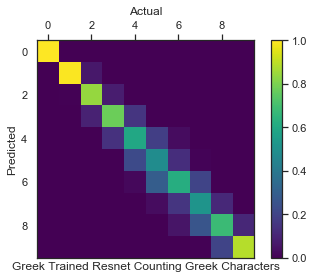

In [59]:
sns.set(style='white')
plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = False
plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = True
plt.imshow(normalised_greek_prediction_matrix, cmap = 'viridis')
plt.colorbar()
plt.title('Actual')
plt.ylabel('Predicted')
plt.xlabel('Greek Trained Resnet Counting Greek Characters')
plt.show()

In [61]:
omniglot_counter_omniglot_predictions = omniglot_counter.predict(omniglot_background_test)

In [62]:
omniglot_predicted_labels = omniglot_counter_omniglot_predictions.argmax(axis=-1)
omniglot_prediction_matrix = np.zeros((10, 10), dtype = np.float64)
for c in range(10):
    for i in range(10):
        count = 0
        for d in range(2000):
            count = count + np.sum(omniglot_predicted_labels[d] == i and omniglot_background_test_labels[d] == c)
        omniglot_prediction_matrix[c, i] = count
omniglot_prediction_matrix = np.transpose(omniglot_prediction_matrix)
print(omniglot_prediction_matrix)

[[221.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0. 208.   9.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   4. 176.  14.   1.   0.   0.   0.   0.   0.]
 [  0.   0.  28. 134.  20.   2.   0.   0.   0.   0.]
 [  0.   0.   0.  31. 108.  56.   7.   0.   0.   0.]
 [  0.   0.   0.   0.  34.  72.  40.   2.   1.   0.]
 [  0.   0.   0.   0.   3.  41.  97.  49.   2.   0.]
 [  0.   0.   0.   0.   0.   4.  57.  86.  36.   0.]
 [  0.   0.   0.   0.   0.   0.   5.  45. 142.  37.]
 [  0.   0.   0.   0.   0.   0.   0.   2.  30. 196.]]


In [63]:
savefolder = r'/Users/AdamHarris/Desktop/CardinalityProximityControl2/'
normalised_omniglot_prediction_matrix = np.zeros((10, 10), dtype = np.float64)
for c in range(10):
    for i in range(10):
       normalised_omniglot_prediction_matrix[c, i] = omniglot_prediction_matrix[c, i] / np.sum(omniglot_prediction_matrix[:, i])
print(normalised_omniglot_prediction_matrix)
df_normalised_omniglot_prediction_matrix = pd.DataFrame(normalised_omniglot_prediction_matrix)
df_normalised_omniglot_prediction_matrix.to_csv(savefolder + 'normalised_omniglot1_prediction_matrix2.csv')

[[1.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.98113208 0.04225352 0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.01886792 0.82629108 0.07821229 0.0060241  0.
  0.         0.         0.         0.        ]
 [0.         0.         0.1314554  0.74860335 0.12048193 0.01142857
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.17318436 0.65060241 0.32
  0.03398058 0.         0.         0.        ]
 [0.         0.         0.         0.         0.20481928 0.41142857
  0.19417476 0.01086957 0.00473934 0.        ]
 [0.         0.         0.         0.         0.01807229 0.23428571
  0.47087379 0.26630435 0.00947867 0.        ]
 [0.         0.         0.         0.         0.         0.02285714
  0.27669903 0.4673913  0.17061611 0.        ]
 [0.         0.         0.         0.         0.         0.
  0.02427184 0.24456522 0.67298578 0.15879828]
 [0

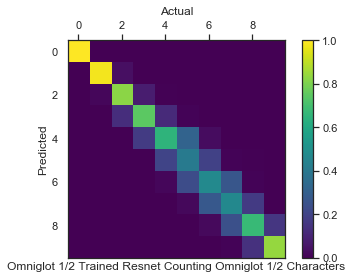

In [64]:
import seaborn as sns
sns.set(palette="colorblind")#(style = "grey", palette="colorblind")

sns.set(style='white')
plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = False
plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = True
plt.imshow(normalised_omniglot_prediction_matrix, cmap = 'viridis')
plt.colorbar()
plt.title('Actual')
plt.ylabel('Predicted')
plt.xlabel('Omniglot 1/2 Trained Resnet Counting Omniglot 1/2 Characters')
plt.show()

In [191]:
summary = greek_letter_counter.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 100, 100, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 106, 106, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 50, 50, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 50, 50, 64)   256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [194]:
df_summary = pd.DataFrame(summary)
df_summary.to_csv(savefolder + 'modelsummary.csv')

In [203]:
inverted_test_images_omnigloteval = 255.0 - omniglot_eval_images
inverted_test_images_greek = 255.0 - greek_test
inveted_test_oniglotbackground = 255.0 - omniglot_background_test
inverted_test_angelic = 255.00 - angelic_images

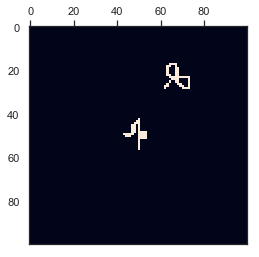

In [199]:
plt.imshow(skimage.color.rgb2gray(inverted_test_images[0]))
plt.show()

In [205]:
iverted_eval_greek_loss, iverted_eval_greek_acc = greek_letter_counter.evaluate(inverted_test_images_greek, greek_test_labels)
print("test_loss=" + str(iverted_eval_greek_loss))
print("test_acc="+ str(iverted_eval_greek_acc))

2000/2000 [==============================] - 98s 49ms/step
test_loss=14.627171440124512
test_acc=0.0925


In [206]:
greek_inverted__predictions = greek_letter_counter.predict(inverted_test_images_greek)

In [208]:
inverted_greek_predicted_labels = greek_inverted__predictions.argmax(axis=-1)
inverted_greek_prediction_matrix = np.zeros((10, 10), dtype = np.float64)
for c in range(10):
    for i in range(10):
        count = 0
        for d in range(2000):
            count = count + np.sum(inverted_greek_predicted_labels[d] == i and greek_test_labels[d] == c)
        inverted_greek_prediction_matrix[c, i] = count
inverted_greek_prediction_matrix = np.transpose(inverted_greek_prediction_matrix)
print(inverted_greek_prediction_matrix)

[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [220. 231. 201. 185. 163. 196. 181. 196. 218. 209.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]]


In [211]:
normalised_inverted_greek_prediction_matrix = np.zeros((10, 10), dtype = np.float64)
for c in range(10):
    for i in range(10):
       normalised_inverted_greek_prediction_matrix[c, i] = inverted_greek_prediction_matrix[c, i] / np.sum(inverted_greek_prediction_matrix[:, i])
print(normalised_inverted_greek_prediction_matrix)
df_normalised_inverted_greek_prediction_matrix = pd.DataFrame(normalised_inverted_greek_prediction_matrix)
df_normalised_inverted_greek_prediction_matrix.to_csv(savefolder + 'normalised_inverted_greek_prediction_matrix.csv')

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


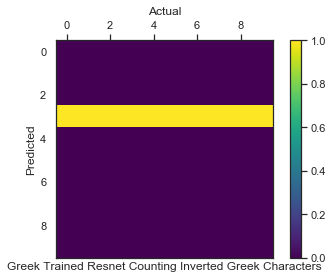

In [212]:
sns.set(style='white')
plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = False
plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = True
plt.imshow(normalised_inverted_greek_prediction_matrix, cmap = 'viridis')
plt.colorbar()
plt.title('Actual')
plt.ylabel('Predicted')
plt.xlabel('Greek Trained Resnet Counting Inverted Greek Characters')
plt.show()

In [215]:
omniglot_inverted__predictions = omniglot_counter.predict(inveted_test_oniglotbackground)

In [227]:
inverted_omniglot_predicted_labels = omniglot_inverted__predictions.argmax(axis=-1)
inverted_omniglot_prediction_matrix = np.zeros((10, 10), dtype = np.float64)
for c in range(10):
    for i in range(10):
        count = 0
        for d in range(2000):
            count = count + np.sum(inverted_omniglot_predicted_labels[d] == i and omniglot_background_test_labels[d] == c)
        inverted_omniglot_prediction_matrix[c, i] = count
inverted_omniglot_prediction_matrix = np.transpose(inverted_omniglot_prediction_matrix)
print(inverted_omniglot_prediction_matrix)

[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [225. 216. 204. 192. 168. 163. 192. 181. 208. 251.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]]


In [229]:
normalised_inverted_omniglot_prediction_matrix = np.zeros((10, 10), dtype = np.float64)
for c in range(10):
    for i in range(10):
       normalised_inverted_omniglot_prediction_matrix[c, i] = inverted_omniglot_prediction_matrix[c, i] / np.sum(inverted_omniglot_prediction_matrix[:, i])
print(normalised_inverted_omniglot_prediction_matrix)
df_normalised_inverted_omniglot_prediction_matrix = pd.DataFrame(normalised_inverted_omniglot_prediction_matrix)
df_normalised_inverted_omniglot_prediction_matrix.to_csv(savefolder + 'normalised_inverted_omniglot_prediction_matrix.csv')

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


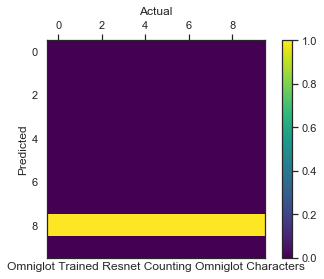

In [230]:
sns.set(style='white')
plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = False
plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = True
plt.imshow(normalised_inverted_omniglot_prediction_matrix, cmap = 'viridis')
plt.colorbar()
plt.title('Actual')
plt.ylabel('Predicted')
plt.xlabel('Omniglot Trained Resnet Counting Omniglot Characters')
plt.show()